# Topic Modeling — Text Files

In these lessons, we're learning about a text analysis method called *topic modeling*. This method will help us identify the main topics or discourses within a collection of texts or single text that has been separated into smaller text chunks.

___

## Dataset

### *New York Times* Obituaries

<blockquote class="epigraph" style=" padding: 10px">

 Georgia O'Keeffe, the undisputed doyenne of American painting and a leader, with her husband, Alfred Stieglitz, of a crucial phase in the development and dissemination of American modernism, died yesterday at St. Vincent Hospital in Santa Fe, N.M.

<p class ="attribution">
    —Edith Evans Asbury, <a href="https://www.nytimes.com/1986/03/07/obituaries/georgia-o-keeffe-dead-at-98-shaper-of-modern-art-in-us.html">Georgia O'Keefe Dead At 98</a>
    </p>
    
</blockquote>

In this particular lesson, we're going to use [Little MALLET Wrapper](https://github.com/maria-antoniak/little-mallet-wrapper), a Python wrapper for [MALLET](http://mallet.cs.umass.edu/topics.php), to topic model 379 obituaries published by *The New York Times*. This dataset is based on data originally collected by Matt Lavin for his *Programming Historian* [TF-IDF tutorial](https://programminghistorian.org/en/lessons/analyzing-documents-with-tfidf#lesson-dataset). I have re-scraped the obituaries so that the subject's name and death year is included in each text file name, and I have added 13 more ["Overlooked"](https://www.nytimes.com/interactive/2018/obituaries/overlooked.html) obituaries, including [Karen Spärck Jones](https://www.nytimes.com/2019/01/02/obituaries/karen-sparck-jones-overlooked.html), the computer scientist who introduced TF-IDF.

___

## Set MALLET Path

:::{note} If you're working in this Jupyter notebook on your own computer, you'll need to have both the Java Development Kit and MALLET pre-installed. For set up instructions, please see <a href="http://melaniewalsh.github.io/Intro-Cultural-Analytics/Text-Analysis/Topic-Modeling-Set-Up.html">the previous lesson </a>. </p>
    
If you're working in this Jupyter notebook in the cloud via Binder, then the Java Development Kit and Mallet will already be installed. You're good to go!  
     
::: 

Since Little MALLET Wrapper is a Python package built around MALLET, we first need to tell it where the bigger, Java-based MALLET lives.

We're going to make a variable called `path_to_mallet` and assign it the file path of our MALLET program. We need to point it, specifically, to the "mallet" file inside the "bin" folder inside the "mallet-2.0.8" folder. 

In [1]:
path_to_mallet = 'mallet-2.0.8/bin/mallet'

If MALLET is located in another directory, then set your `path_to_mallet` to that file path.

## Install Packages

In [ ]:
#!pip install little_mallet_wrapper
#!pip install seaborn

## Import Packages

In [ ]:
#!pip install little_mallet_wrapper
#!pip install seaborn

Now let's `import` the `little_mallet_wrapper` and the data viz library `seaborn`.

In [3]:
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path

We're also going to import [`glob`](https://docs.python.org/3/library/glob.html) and [`pathlib`](https://docs.python.org/3/library/pathlib.html#basic-use) for working with files and the file system.

## Get Training Data From Text Files

Before we topic model the *NYT* obituaries, we need to process the text files and prepare them for analysis. The steps below demonstrate how to process texts if your corpus is a collection of separate text files. In the next lesson, we'll demonstrate how to process texts that come from a CSV file.

:::{note}   
We're calling these text files our *training data*, because we're *training* our topic model with these texts. The topic model will be learning and extracting topics based on these texts.
    
:::

To get the necessary text files, we're going to make a variable and assign it the file path for the directory that contains the text files.

In [4]:
directory = "../texts/history/NYT-Obituaries/"

Then we're going to use the `glob.gob()` function to make a list of all (`*`) the `.txt` files in that directory.

In [5]:
files = glob.glob(f"{directory}/*.txt")

In [6]:
files

['../texts/history/NYT-Obituaries/1945-Adolf-Hitler.txt',
 '../texts/history/NYT-Obituaries/1915-F-W-Taylor.txt',
 '../texts/history/NYT-Obituaries/1975-Chiang-Kai-shek.txt',
 '../texts/history/NYT-Obituaries/1984-Ethel-Merman.txt',
 '../texts/history/NYT-Obituaries/1953-Jim-Thorpe.txt',
 '../texts/history/NYT-Obituaries/1964-Nella-Larsen.txt',
 '../texts/history/NYT-Obituaries/1955-Margaret-Abbott.txt',
 '../texts/history/NYT-Obituaries/1984-Lillian-Hellman.txt',
 '../texts/history/NYT-Obituaries/1959-Cecil-De-Mille.txt',
 '../texts/history/NYT-Obituaries/1928-Mabel-Craty.txt',
 '../texts/history/NYT-Obituaries/1973-Eddie-Rickenbacker.txt',
 '../texts/history/NYT-Obituaries/1989-Ferdinand-Marcos.txt',
 '../texts/history/NYT-Obituaries/1991-Martha-Graham.txt',
 '../texts/history/NYT-Obituaries/1997-Deng-Xiaoping.txt',
 '../texts/history/NYT-Obituaries/1938-George-E-Hale.txt',
 '../texts/history/NYT-Obituaries/1885-Ulysses-Grant.txt',
 '../texts/history/NYT-Obituaries/1909-Sarah-Orne-Je

## Process Texts

```
little_mallet_wrapper.process_string(text, numbers='remove')
```

Next we process our texts with the function `little_mallet_wrapper.process_string()`. This function will take every individual text file, transform all the text to lowercase as well as remove stopwords, punctuation, and numbers, and then add the processed text to our master list `training_data`.

:::{admonition} Python Review
:class: pythonreview
Take a moment to study this code and reflect about what's happening here. This is a very common Python pattern! We make an empty list, iterate through every file, open and read each text file, process the texts, and finally append them to the previously empty list. 
    
:::

In [7]:
training_data = []
for file in files:
    text = open(file, encoding='utf-8').read()
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove')
    training_data.append(processed_text)

We're also making a master list of the original text of the obituaries for future reference.

In [8]:
original_texts = []
for file in files:
    text = open(file, encoding='utf-8').read()
    original_texts.append(text)

## Process Titles

Here we extract the relevant part of each file name by using [`Path().stem`](https://docs.python.org/3/library/pathlib.html#pathlib.PurePath.stem), which conveniently extracts just the last part of the file path without the ".txt" file extension. Because each file name includes the obituary subject's name as well as the year that the subject died, we're going to use this information as a title or label for each obituary.

In [9]:
obit_titles = [Path(file).stem for file in files]

In [10]:
obit_titles

['1945-Adolf-Hitler',
 '1915-F-W-Taylor',
 '1975-Chiang-Kai-shek',
 '1984-Ethel-Merman',
 '1953-Jim-Thorpe',
 '1964-Nella-Larsen',
 '1955-Margaret-Abbott',
 '1984-Lillian-Hellman',
 '1959-Cecil-De-Mille',
 '1928-Mabel-Craty',
 '1973-Eddie-Rickenbacker',
 '1989-Ferdinand-Marcos',
 '1991-Martha-Graham',
 '1997-Deng-Xiaoping',
 '1938-George-E-Hale',
 '1885-Ulysses-Grant',
 '1909-Sarah-Orne-Jewett',
 '1957-Christian-Dior',
 '1987-Clare-Boothe-Luce',
 '1976-Jacques-Monod',
 '1954-Getulio-Vargas',
 '1979-Stan-Kenton',
 '1990-Leonard-Bernstein',
 '1972-Jackie-Robinson',
 '1998-Fred-W-Friendly',
 '1991-Leo-Durocher',
 '1915-B-T-Washington',
 '1997-James-Stewart',
 '1981-Joe-Louis',
 '1983-Muddy-Waters',
 '1942-George-M-Cohan',
 '1989-Samuel-Beckett',
 '1962-Marilyn-Monroe',
 '2000-Charles-M-Schulz',
 '1967-Gregory-Pincus',
 '1894-R-L-Stevenson',
 '1978-Bruce-Catton',
 '1982-Arthur-Rubinstein',
 '1875-Andrew-Johnson',
 '1974-Charles-Lindbergh',
 '1964-Rachel-Carson',
 '1953-Marjorie-Rawlings',


## Get Training Data Stats

We can get training data summary statistics by using the function ```little_mallet_wrapper.print_dataset_stats()```.

In [11]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 379
Mean Number of Words per Document: 1314.6
Vocabulary Size: 35983


According to this little report, we have 378 documents (or obituaries) that average 1345 words in length.

## Training the Topic Model

We're going to train our topic model with the `little_mallet_wrapper.train_topic_model()` function. As you can see above, however, this function requires 6 different arguments and file paths to run properly. 

### Set Number of Topics

We need to make a variable `num_topics` and assign it the number of topics we want returned.

In [12]:
num_topics = 15

### Set Training Data

We already made a variable called `training_data`, which includes all of our processed obituary texts, so we can just set it equal to itself.

In [13]:
training_data = training_data

### Set Topic Model Output Files

Finally, we need to tell Little MALLET Wrapper where to find and output all of our topic modeling results. The code below will set Little MALLET Wrapper up to output your results inside a directory called "topic-model-output" and a subdirectory called "NYT-Obits", all of which will be inside your current directory.

If you'd like to change this output location, simply change `output_directory_path` below.

In [14]:
#Change to your desired output directory
output_directory_path = 'topic-model-output/NYT-Obits'

#No need to change anything below here
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

### Train Topic Model

Then we're going to train our topic model with `little_mallet_wrapper.quick_train_topic_model()`. The topic model should take about 1-1.5 minutes to train and complete. If you want it, you can look at your Terminal or PowerShell and see what the model looks like as it's training.

In [15]:
little_mallet_wrapper.quick_train_topic_model(path_to_mallet,
                                             output_directory_path,
                                             num_topics,
                                             training_data)

Importing data...
Complete
Training topic model...
Complete


([['one',
   'would',
   'said',
   'time',
   'could',
   'man',
   'life',
   'years',
   'never',
   'made',
   'people',
   'many',
   'later',
   'first',
   'two',
   'long',
   'even',
   'came',
   'way',
   'also'],
  ['book',
   'wrote',
   'published',
   'said',
   'writing',
   'writer',
   'novel',
   'books',
   'author',
   'life',
   'story',
   'literary',
   'stories',
   'write',
   'work',
   'poet',
   'short',
   'writers',
   'poetry',
   'novels'],
  ['president',
   'state',
   'roosevelt',
   'court',
   'justice',
   'house',
   'states',
   'party',
   'black',
   'law',
   'political',
   'united',
   'governor',
   'campaign',
   'democratic',
   'republican',
   'election',
   'rights',
   'warren',
   'congress'],
  ['baseball',
   'game',
   'louis',
   'won',
   'ruth',
   'team',
   'tennis',
   'league',
   'babe',
   'rickey',
   'first',
   'golf',
   'football',
   'record',
   'champion',
   'abbott',
   'club',
   'season',
   'dempsey',
   'bl

When the topic model finishes, it will output your results to your `output_directory_path`.

## Display Topics and Top Words

To examine the 15 topics that the topic model extracted from the *NYT* obituaries, run the cell below. This code uses the `little_mallet_wrapper.load_topic_keys()` function to read and process the MALLET topic model output from your computer, specifically the file "mallet.topic_keys.15".

>*Take a minute to read through every topic. Reflect on what each topic seems to capture as well as how well you think the topics capture the broad themes of the entire collection. Note any oddities, outliers, or inconsistencies.*

In [16]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

for topic_number, topic in enumerate(topics):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")

✨Topic 0✨

['one', 'would', 'said', 'time', 'could', 'man', 'life', 'years', 'never', 'made', 'people', 'many', 'later', 'first', 'two', 'long', 'even', 'came', 'way', 'also']

✨Topic 1✨

['book', 'wrote', 'published', 'said', 'writing', 'writer', 'novel', 'books', 'author', 'life', 'story', 'literary', 'stories', 'write', 'work', 'poet', 'short', 'writers', 'poetry', 'novels']

✨Topic 2✨

['president', 'state', 'roosevelt', 'court', 'justice', 'house', 'states', 'party', 'black', 'law', 'political', 'united', 'governor', 'campaign', 'democratic', 'republican', 'election', 'rights', 'warren', 'congress']

✨Topic 3✨

['baseball', 'game', 'louis', 'won', 'ruth', 'team', 'tennis', 'league', 'babe', 'rickey', 'first', 'golf', 'football', 'record', 'champion', 'abbott', 'club', 'season', 'dempsey', 'black']

✨Topic 4✨

['years', 'new', 'first', 'york', 'one', 'american', 'became', 'last', 'home', 'mrs', 'later', 'two', 'year', 'world', 'died', 'time', 'death', 'old', 'born', 'times']

✨Topi

## Load Topic Distributions

MALLET also calculates the likely mixture of these topics for every single obituary in the corpus. This mixture is really a probability distribution, that is, the probability that each topic exists in the document. We can use these probability distributions to examine which of the above topics are strongly associated with which specific obituaries.

To get the topic distributions, we're going to use the `little_mallet_wrapper.load_topic_distributions()` function, which will read and process the MALLET topic model output, specifically the file "mallet.topic_distributions.15". 

In [17]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

If we look at the 32nd topic distribution in this list of `topic_distributions`, which corresponds to Marilyn Monroe's obituary, we will see a list of 15 probabilities. This  list corresponds to the likelihood that each of the 15 topics exists in Marilyn Monroe's obituary.

In [18]:
topic_distributions[32]

[0.36054595600789047,
 0.00025639621105210574,
 0.0003903512242116964,
 0.08695581731648391,
 0.27222344675469345,
 0.001785481585425372,
 0.0001182410956030627,
 0.00012667203812443808,
 0.00013194738281021722,
 0.0002546559917063317,
 0.00332266879500217,
 0.01412539295210924,
 0.035995054909529624,
 0.21889193703216597,
 0.0048759807031919025]

It's a bit easier to understand if we pair these probabilities with the topics themselves. As you can see below, Topic 13 "miss film theater movie broadway films" has a relatively high probability of existing in Marilyn Monroe's obituary `.219` while Topic 5 "soviet party mao hitler china war" has a relatively low probability `.005`. This seems to comport with what we know about Marilyn Monroe.

In [19]:
obituary_to_check = "1962-Marilyn-Monroe"

obit_number = obit_titles.index(obituary_to_check)

print(f"Topic Distributions for {obit_titles[obit_number]}\n")
for topic_number, (topic, topic_distribution) in enumerate(zip(topics, topic_distributions[obit_number])):
    print(f"✨Topic {topic_number} {topic[:6]} ✨\nProbability: {round(topic_distribution, 3)}\n")

Topic Distributions for 1962-Marilyn-Monroe

✨Topic 0 ['one', 'would', 'said', 'time', 'could', 'man'] ✨
Probability: 0.361

✨Topic 1 ['book', 'wrote', 'published', 'said', 'writing', 'writer'] ✨
Probability: 0.0

✨Topic 2 ['president', 'state', 'roosevelt', 'court', 'justice', 'house'] ✨
Probability: 0.0

✨Topic 3 ['baseball', 'game', 'louis', 'won', 'ruth', 'team'] ✨
Probability: 0.087

✨Topic 4 ['years', 'new', 'first', 'york', 'one', 'american'] ✨
Probability: 0.272

✨Topic 5 ['general', 'gen', 'grant', 'army', 'war', 'president'] ✨
Probability: 0.002

✨Topic 6 ['war', 'israel', 'minister', 'peace', 'gandhi', 'british'] ✨
Probability: 0.0

✨Topic 7 ['queen', 'prince', 'england', 'victoria', 'king', 'schweitzer'] ✨
Probability: 0.0

✨Topic 8 ['music', 'band', 'jazz', 'piano', 'musical', 'sinatra'] ✨
Probability: 0.0

✨Topic 9 ['company', 'business', 'oil', 'ford', 'rockefeller', 'hill'] ✨
Probability: 0.0

✨Topic 10 ['university', 'professor', 'research', 'science', 'scientific', 'o

## Explore Heatmap of Topics and Texts

We can visualize and compare these topic probability distributions with a heatmap by using the `little_mallet_wrapper.plot_categories_by_topics_heatmap()` function.

We have everything we need for the heatmap except for our list of target_labels, the sample of texts that we’d like to visualize and compare with the heatmap. Below we make our list of desired target labels.

In [20]:
target_labels = ['1852-Ada-Lovelace', '1885-Ulysses-Grant',
                 '1900-Nietzsche', '1931-Ida-B-Wells', '1940-Marcus-Garvey',
                 '1941-Virginia-Woolf', '1954-Frida-Kahlo', '1962-Marilyn-Monroe',
                 '1963-John-F-Kennedy', '1964-Nella-Larsen', '1972-Jackie-Robinson',
                 '1973-Pablo-Picasso', '1984-Ray-A-Kroc','1986-Jorge-Luis-Borges', '1991-Miles-Davis',
                 '1992-Marsha-P-Johnson', '1993-Cesar-Chavez']

If you'd like to make a random list of target labels, you can uncomment and run the cell below.

In [21]:
#import random
#target_labels = random.sample(obit_titles, 10)

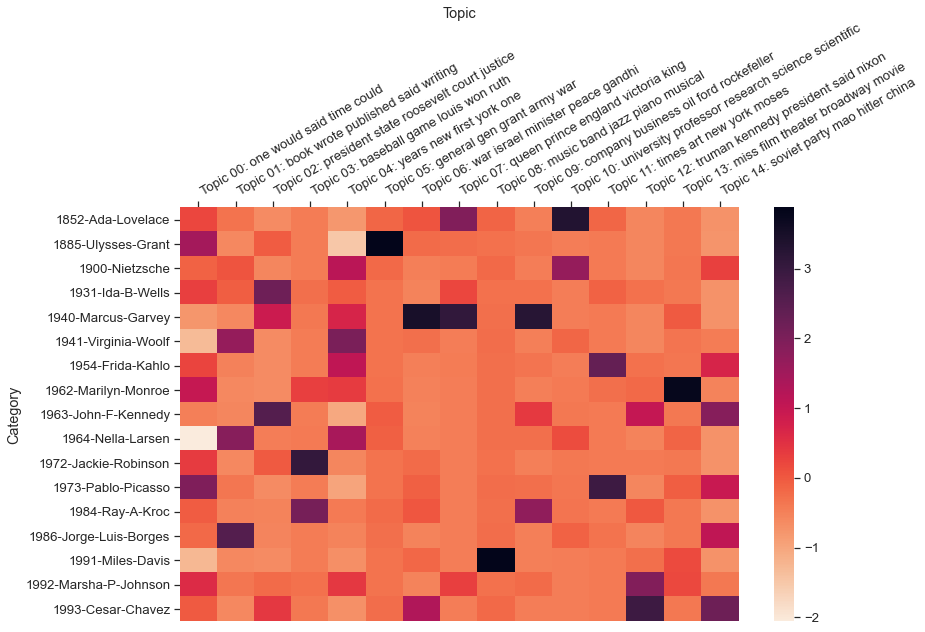

In [22]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(obit_titles,
                                      topic_distributions,
                                      topics, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels=target_labels,
                                      dim= (13, 9)
                                     )

The darker squares in this heatmap represent a high probability for the corresponding topic (compared to everyone else in the heatmap) and the lighter squares in the heatmap represent a low probability for the corresponding topic. For example, if you scan across the row of Marilyn Monroe, you can see a dark square for the topic "miss film theater movie theater broadway". If you scan across the row of Ada Lovelace, an English mathematician who is now recognized as the first computer programmer, according to her [NYT obituary](https://www.nytimes.com/interactive/2018/obituaries/overlooked-ada-lovelace.html), you can see a dark square for "university professor research science also".

The `plot_categories_by_topics_heatmap()` function also helpfully outputs a PDF of the heatmap to `output_directory_path + '/categories_by_topics.pdf'`. We can download this PDF and explore it in more detail or embed it in an article or blog post!

In [2]:
from IPython.display import IFrame
IFrame("topic-model-output/NYT-Obits/categories_by_topics.pdf", width=1000, height=600)

## Display Top Titles Per Topic

We can also display the obituaries that have the highest probability for every topic with the `little_mallet_wrapper.get_top_docs()` function.

Because most of the obituaries in our corpus are pretty long, however, it will be more useful for us to simply display the title of each obituary, rather than the entire document—at least as a first step. To do so, we'll first need to make two dictionaries, which will allow us to find the corresponding obituary title and the original text from a given training document.

In [24]:
training_data_obit_titles = dict(zip(training_data, obit_titles))
training_data_original_text = dict(zip(training_data, original_texts))

Then we'll make our own function `display_top_titles_per_topic()` that will display the top text titles for every topic. This function accepts a given `topic_number` as well as a desired `number_of_documents` to display.

In [25]:
def display_top_titles_per_topic(topic_number=0, number_of_documents=5):
    
    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        print(round(probability, 4), training_data_obit_titles[document] + "\n")
    return

**Topic 0**

To display the top 5 obituary titles with the highest probability of containing Topic 0, we will run:

In [26]:
display_top_titles_per_topic(topic_number=0, number_of_documents=5)

✨Topic 0✨

['one', 'would', 'said', 'time', 'could', 'man', 'life', 'years', 'never', 'made', 'people', 'many', 'later', 'first', 'two', 'long', 'even', 'came', 'way', 'also']

0.4786 1987-James-Baldwin

0.4647 1882-Charles-Darwin

0.4594 1974-Sylvia-Plath

0.4452 1978-Golda-Meir

0.4429 1935-Adolph-S-Ochs



**What would you label this topic?**

To display the top 5 obituary titles with the highest probability of containing Topic 9, we will run:

In [27]:
display_top_titles_per_topic(topic_number=9, number_of_documents=5)

✨Topic 9✨

['company', 'business', 'oil', 'ford', 'rockefeller', 'hill', 'carnegie', 'president', 'keller', 'getty', 'barnum', 'cleveland', 'bell', 'sloan', 'church', 'stock', 'money', 'companies', 'day', 'general']

0.4206 1956-Charles-Merrill

0.3872 1966-Alfred-P-Sloan-Jr

0.3799 1947-Henry-Ford

0.358 1915-F-W-Taylor

0.3575 1937-John-Rockefeller



**What would you label this topic?**

To display the top 7 obituaries with the highest probability of containing Topic 8, we will run:

In [28]:
display_top_titles_per_topic(topic_number=8, number_of_documents=7)

✨Topic 8✨

['music', 'band', 'jazz', 'piano', 'musical', 'sinatra', 'composer', 'goodman', 'orchestra', 'played', 'stravinsky', 'works', 'bernstein', 'concert', 'armstrong', 'playing', 'musicians', 'davis', 'style', 'opera']

0.5833 1983-Earl-Hines

0.5748 1993-Dizzy-Gillespie

0.5657 1991-Miles-Davis

0.5451 1993-Carlos-Montoya

0.5352 1983-Muddy-Waters

0.5091 1986-Benny-Goodman

0.498 1984-Count-Basie



**What would you label this topic?**

## Display Topic Words in Context of Original Text

Often it's useful to actually look at the document that has ranked highly for a given topic and puzzle out why it ranks so highly.

To display the original obituary texts that rank highly for a given topic, with the relevant topic words **bolded** for emphasis, we are going to make the function `display_bolded_topic_words_in_context()`.

In the cell below, we're importing two special Jupyter notebook display modules, which will allow us to make the relevant topic words **bolded**, as well as the regular expressions library `re`, which will allow us to find and replace the correct words.

In [29]:
from IPython.display import Markdown, display
import re

def display_bolded_topic_words_in_context(topic_number=3, number_of_documents=3, custom_words=None):

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        
        print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")
        
        probability = f"✨✨✨\n\n**{probability}**"
        obit_title = f"**{training_data_obit_titles[document]}**"
        original_text = training_data_original_text[document]
        topic_words = topics[topic_number]
        topic_words = custom_words if custom_words != None else topic_words

        for word in topic_words:
            if word in original_text:
                original_text = re.sub(f"\\b{word}\\b", f"**{word}**", original_text)

        display(Markdown(probability)), display(Markdown(obit_title)), display(Markdown(original_text))
    return

**Topic 3**

To display the top 3 original obituaries with the highest probability of containing Topic 0 and with relevant topic words bolded, we will run:

In [30]:
display_bolded_topic_words_in_context(topic_number=3, number_of_documents=3)

✨Topic 3✨

['baseball', 'game', 'louis', 'won', 'ruth', 'team', 'tennis', 'league', 'babe', 'rickey', 'first', 'golf', 'football', 'record', 'champion', 'abbott', 'club', 'season', 'dempsey', 'black']



✨✨✨

**0.6523135065601782**

**1941-Lou-Gehrig**

June 3, 1941

 OBITUARY

 Gehrig's Impressive Records

 By THE NEW YORK TIMESThe major records that Gehrig made:

 Most consecutive games--2,130.

 Most consecutive years, 100 games or more--14.

 Most years, 150 games or more--12.

 Most years, 100 runs or more--13.

 Most consecutive years, 100 runs or more--13.

 Most years, 100 or more runs batted in--13 (tied with Ruth).

 Most years, 150 or more runs batted in--7.

 Most consecutive years, 100 or more runs batted in--13.

 Most runs batted in, one **season**--184 (American League).

 Most times, four long hits in one **game**--5.

 Most years, 400 or more total bases--5.

 Most years, 300 or more total bases--13.

 Most home runs with bases filled--23.

 Most consecutive home runs in one **game**--4 (modern **record**).

 Most total bases, one **game** (modern **record**)--16 (tied with Ruth and Klein).

 Most years, leading **league**, runs batted in--5 (tied with Ruth).

 Most years, leading **league** games played, **season**--8.

 First baseman participating in most double plays, **season**--157.

 World Series

 Highest batting percentage, total series--.361 (7 series).

 Most runs, one series--9 (tied with Ruth).

 Most runs batted in, total series--35.

 Most runs batted in, one series--9.

 Most home runs, one four-**game** series--4.

 Most home runs, 3 consecutive games--4.

 Most extra bases on long hits, one series--13.

 



✨Topic 3✨

['baseball', 'game', 'louis', 'won', 'ruth', 'team', 'tennis', 'league', 'babe', 'rickey', 'first', 'golf', 'football', 'record', 'champion', 'abbott', 'club', 'season', 'dempsey', 'black']



✨✨✨

**0.5762678365738184**

**1985-Roger-Maris**

December 15, 1985

 OBITUARY

 Roger Maris is Dead at 51, Set Record Home Runs

 By JOSEPH DURSO

 Roger Maris, who held the major **league** **record** for the most home runs in a single **season**, died yesterday at M. D. Anderson Hospital and Tumor Institute in Houston after a two-year bout with cancer, hospital officials said. He was 51 years old.

 During the early 1960's when the New York Yankees reigned for five straight pennant-winning seasons, Roger Maris was all things to all people. But **baseball** history will remember him as the home-run twin to Mickey Mantle, and generations of fans will remember him as the man with the asterisk in the **record** books: *Hit 61 home runs in 1961 in a 162-**game** **season**.

 The asterisk was inserted to distinguish Maris's home-run **record** from the one set in 1927 by the greatest Yankee of them all: Babe Ruth, who hit 60 in the days of the 154-**game** **season**.

 It was inserted into the **record** books by Ford C. Frick, the commissioner of **baseball**, who apparently reflected the traditionalist view of many fans that the Olympian feats of Babe Ruth must be defended against long seasons, short fences and newly arrived sluggers -even one who eventually played in seven World Series and hit 275 home runs in 12 seasons in the big leagues.

 Set Mark on Final Day

 But, on Oct. 1. 1961, asterisk or no asterisk, Roger Maris made history when he hit his 61st home run of the **season** in his 161st **game** on the final day of the 162-**game** **season** in Yankee Stadium against

 Tracy Stallard of the Boston Red Sox.

 It was the rousing end to a rousing **season**, and it ended with the Yankees winning the pennant race before roaring sellout crowds and swarms of writers and broadcasters drawn by Mantle and Maris, the power hitters on yet another great Yankee **team**. Mantle, who was injured in September, still managed to hit 54 home runs, so the ''twins'' combined for an awesome total of 115.

 But Maris, an accomplished outfielder with a powerful arm and bat, was besieged as he pursued the memory and the **record** of Ruth.

 And yet, Maris was not universally embraced for his achievement. The Yankees received 3,000 messages a day during the final weeks of the **season**, many of them cheering him on. But the commissioner, a onetime colleague of Babe Ruth, announced that any **record** would have to be set in 154 games. And Rogers Hornsby, the Hall of Fame slugger, who also had been a contemporary of Ruth, said in the passion of the day: ''Maris has no right to break Ruth's **record**.''

 Maris had no ''right'' to break Ruth's **record** ostensibly because he was none of the things that had made Babe Ruth renowned as the Bambino. He was imported to the Yankees from the Kansas City Athletics, a stocky figure with a blond crewcut, and he was playing only his second **season** in the celebrated pinstripes. He was considered an upstart in the House That Ruth Built, and the house that Mantle dominated. He was dour, aloof, sometimes arch, and in no way the flamboyant bear portrayed by Babe Ruth.

 His manager in 1960, Casey Stengel, once said: ''You ask Maris a question, and he stares at you for a week before he answers.'' ''I was born surly,'' Maris acknowledged in 1961 when the home-run race had ended, ''and I'm going to stay that way. Everything in life is tough. ''Even the Yankee clubhouse attendants think I'm tough to live with. I guess they're right. I'm miffed most of the time, regardless of how I'm doing. But, regardless of my faults, I'll never take abuse from anybody - big or small, important or unimportant - if I think it's undeserved.''

 Star Athlete in School

 Roger Eugene Maris was born in Hibbing, Minn., on Sept. 10, 1934, but was still an infant when his family moved to Fargo. N.D. The family name was Maras, but he changed it legally in 1955 to Maris.

 He was an outstanding athlete at Shanley High School, a star in basketball and track and an all-state halfback in **football**. The school had no **baseball** **team**, but he played American Legion ball and became a star there, too.

 When he graduated from high school, the University of Oklahoma offered Maris a **football** scholarship, but a scout for the Cleveland Indians persuaded him to try for a **baseball** career. He offered a $5,000 bonus and $10,000 more if Maris made the big leagues, and Maris signed.

 It didn't take him long to redeem the full bonus. He broke into professional ball in 1954 in Keokuk, advanced in 1955 to Reading, then in 1956 to Indianapolis in the American Association, one notch below the majors. One year later, in 1957, he was playing outfield for the Indians.

 Traded to the Yankees

 But on June 15, 1958, he was traded to the Kansas City Athletics with Dick Tomanek and Preston Ward for Vic Power and Woodie Held. And a year and a half later, on Dec. 11, 1959, with some recognition as a blooming power hitter, he was traded to New York with Joe DeMaestri and Kent Hadley for Don Larsen, Hank Bauer, Norm Siebern and Marv Throneberry. He was 25 years old and a Yankee.

 It didn't take Maris long to ''join the **club**.'' In his debut in 1960, he hit a single, double and two home runs. He finished the **season** with 39 home runs, and the Yankees **won** the American League pennant and began a streak of five straight pennants.

 In 1961, the **season** that made him both famous and controversial, he posted these numbers: 161 games, 590 times at bat, 159 hits, 94 walks, 67 strikeouts, 132 runs scored, 142 runs batted in, a batting average of .269 -and 61 home runs.

 But, if 1961 was a difficult time for Maris, he soon found that 1962 was an ordeal. He was engulfed wherever he went, cheerleaders asking if he could hit more than 61 home runs, critics asking why not.

 He hit 33.

 Yankees' Era Ends

 After 1964, the Yankees stopped winning pennants after an extraordinary run of 14 in 16 years. Maris, meanwhile, endured several seasons of injuries to his back, hand and legs, and said later that he was outraged by intimations that he had been exaggerating his ailments. On Dec. 8, 1966, he was traded to the St. Louis Cardinals, where he again distinguished himself as a professional with a strong right-handed throwing arm from right field and a strong left-handed swing at the plate.

 He played in the World Series of 1967 and 1968 for the Cardinals, and then retired at the close of the 1968 **season**. His career line, with no asterisk, read: 12 years in the big leagues, 1,463 games, 5,101 times at bat, 1,325 hits, 275 home runs, 826 runs, 851 runs batted in and an average of .260. In seven World Series, he hit six home runs.

 For many years, Maris lived in Independence, Mo., with his wife, the former Patricia Carvell, and their six children. After retiring from **baseball**, he lived in Gainesville, Fla., where he owned a beer distributorship.

 For a while, he shunned old-timers' games, because he resented the criticism and controversy from his playing days. But he began to appear at reunions later, and he remained close friends with Mantle,

 Whitey Ford, Yogi Berra, Tony Kubek and his other teammates from the time when the Yankees ruled the day.

 Funeral services will be held at noon Thursday at St. Mary's Cathedral in Fargo, N.D.

 



✨Topic 3✨

['baseball', 'game', 'louis', 'won', 'ruth', 'team', 'tennis', 'league', 'babe', 'rickey', 'first', 'golf', 'football', 'record', 'champion', 'abbott', 'club', 'season', 'dempsey', 'black']



✨✨✨

**0.5630222462450198**

**1955-Cy-Young**

November 5, 1955

 OBITUARY

 Cy Young Is Dead; Famed Pitcher, 88

 BY THE NEW YORK TIMES

 NEWCOMERSTOWN, Ohio, Nov. 4 (AP)--Denton True (Cy) Young, one of **baseball**'s great pitchers, died today at the age of 88.

 A member of **baseball**'s Hall of Fame, Mr. Young was stricken while sitting in a chair in the home of Mr. and Mrs. John Benedum, with whom he made his home near here.

 His Feats Unequaled

 Traded to the majors from the minors for a suit of clothing, Cy Young thrilled the **baseball** world from 1890 to 1911 with a blazing fast ball that set pitching records still unequaled.

 Six feet two inches tall and weighing 210 pounds, this Ohio farmer pitched and **won** more games than any major leaguer. When he retired at the age of 45 because his legs had weakened, he had **won** 511 of 826 decisions in both leagues and for five teams. In all, he hurled in 906 games.

 As the starting pitcher for the Boston Red Sox in 1903, Mr. Young threw the **first** pitch in a world series **game**. Fifty years later, as a guest at the opening **game** of the world series between the Brooklyn Dodgers and New York Yankees, he stood in the pitcher's box and threw a ceremonial strike to the Yankee catcher, Yogi Berra, to open the series. He was 86 at the time.

 During his career, he was a thirty-**game** winner five seasons; a twenty-**game** victor sixteen times. He pitched one perfect **game**, two other no-hit shutouts and performed the "iron man" feat of hurling and winning complete games of a doubleheader.

 One of the early members of the **baseball** Hall of Fame at Cooperstown, N.Y., Mr. Young pitched for the Cleveland Nationals, St. Louis Cardinals, Red Sox and Cleveland Indians and Boston Braves. He **won** 291 National League games and 220 in the American.

 Had 36-10 Mark in 1892

 For fourteen consecutive years, beginning in 1891, Mr. Young **won** twenty or more games. The 1892 **season**, when he posted a 36-10 **record**, was his best.

 Mr. Young's feat of pitching twenty-three consecutive hitless innings over a four-**game** span early in 1904 still stands as a major **league** **record**. His total of 2,836 strikeouts was surpassed only by the late Walter Johnson's 3,497.

 He was born on a farm in Gilmore, Ohio, on March 29, 1867. While pitching for the Canton (Ohio) **club** of the old Tri-State League in 1890, Mr. Young was nicknamed Cy. "I thought I had to show all my stuff," he recalled years later, "and

 I almost tore the boards off the grandstand with my fast ball. One of the fellows called me 'Cyclone,' but finally shortened it to 'Cy,' and it's been that ever since."

 The **league** disbanded during the 1890 **season** and the pitcher joined the Cleveland Nationals early in August of that year.

 Pitched, Won Doubleheader

 Still a gawky country boy, he made his major **league** debut against Cap Anson's Chicago White Stockings and **won** the **game**. Mr. Young **won** 10 and lost 7 for Cleveland during the late stages of the **season**. Two of those victories were obtained on Oct. 4, when he captured both ends of a doubleheader against Philadelphia.

 In his **first** complete major **league** campaign the next year, Mr. Young **won** 27 and lost 22 games. For the next thirteen seasons he stayed above the .500 mark. He pitched his **first** major **league** no- hit, no-run contest on Sept. 18, 1897, blanking Cincinnati, 6 to 0. His affiliation with Cleveland ended after the 1898 campaign and he played with the St. Louis Cardinals in 1899 and 1900.

 Mr. Young began eight years with the Red Sox in 1901. While blanking Philadelphia on May 5, 1904, he did not permit an opposing runner to reach **first** base. It was the third perfect **game** in major **league** history. On June 30, 1908, he **won** his third no-hit, no-run decision in the majors by shutting out New York, 8 to 0.

 He was traded to the Cleveland Indians in 1909, and in the middle of the 1911 campaign was traded to the Braves. He retired to his farm near Peoli, Ohio, after that **season**.

 



**Topic 8**

To display the top 3 original obituaries with the highest probability of containing Topic 8 and with relevant topic words bolded, we will run:

In [31]:
display_bolded_topic_words_in_context(topic_number=8, number_of_documents=3)

✨Topic 8✨

['music', 'band', 'jazz', 'piano', 'musical', 'sinatra', 'composer', 'goodman', 'orchestra', 'played', 'stravinsky', 'works', 'bernstein', 'concert', 'armstrong', 'playing', 'musicians', 'davis', 'style', 'opera']



✨✨✨

**0.5832633448522652**

**1983-Earl-Hines**

April 24, 1983

 OBITUARY

 Earl Hines, 77, Father of Modern Jazz Piano, Dies

 By JON PARELES

 Earl (Fatha) Hines, the father of modern **jazz** **piano**, died Friday in Oakland, Calif., after a heart attack. He was 77 years old. In his pioneering work with Louis Armstrong in the late 1920's, Mr.

 Hines virtually redefined **jazz** **piano**. With what he called ''trumpet **style**,'' Mr. Hines **played** horn-like solo lines in octaves with his right hand and spurred them with chords from his left. He thus carved a place for the **piano** as a solo instrument outside the rhythm section and defined the roles of both hands for the next generations of **jazz** pianists.

 Mr. Hines's strong right hand and angular melodic ideas continued to sound contemporary throughout his career. In the 1930's and 1940's, he led a Chicago big **band** that began the careers of the singers Billy Eckstine and Sarah Vaughan and included the saxophonists Wardell Gray and Budd Johnson. That **band** became an incubator for be-bop in the early 1940's, when it featured the trumpeter Dizzy Gillespie and the saxophonist Charlie

 Parker.

 Son of Two Musicians

 Earl Hines was born in Duquesne, Pa. His father was a trumpeter and his mother **played** **piano** and organ. He took up the trumpet as a child, but began studying classical **piano** at the age of 9. After three years of lessons, he decided he was more interested in **jazz** **piano**, and by the time he was 15 years old he was leading his own trio.

 Mr. Hines worked with big bands led by Lois B. Deppe in Pittsburgh and Carroll Dickerson and Sammy Stewart in Chicago, and in 1927 he joined a quintet led by Louis Armstrong at Chicago's Savoy Ballroom.

 With Mr. Armstrong, he made such recordings as ''West End Blues'' and ''Weather Bird,'' and in 1928 he recorded solos, including ''A Monday Date'' and ''Caution Blues,'' that established his **style** and have had a lasting influence on **jazz** **piano**.

 Mr. Hines started his own big **band** in 1928 at Chicago's Grand Terrace Ballroom, and stayed in residence there for more than a decade, although he toured for part of each year. His was one of the first black big bands to tour the South.

 Thn ''Jelly Jelly'' and ''Stormy Monday Blues.'' Although he left the Grand Terrace in 1940, Mr. Hines led a big **band** nearly continuously until 1947; at one point the group included a string section composed entirely of women.

 Origin of Nickname

 A Chicago disk jockey called him ''Fatha'' in the 1930's and the nickname - as in ''Father of modern **piano**'' -stayed with him. After dissolving his **band**, Mr. Hines worked with smaller groups. He rejoined Mr.

 Armstrong from 1948 to 1951, then led his own bands. In 1957, he toured Europe with an all-star group including the trombonist Jack Teagarden, but he spent much of the 1950's **playing** Dixieland **jazz** - **music** that he had not be Jack Teagarden, but he spent much of the 1950's **playing** Dixieland **jazz** - **music** that he had not been a part of - on the West Coast.

 He re-emerged with triumphant concerts and recordings in the early 1960's, and was elected a member of Downbeat magazine's **jazz** hall of fame in 1965. In 1966, the United States sponsored Mr. Hines' group on a tour of the Soviet Union, where he **played** for 92,000 people.

 Since the 1950's, Mr. Hines had been based in the San Francisco Bay area, and he continued to tour Europe, Japan and the United States through the early 1980's. He **played** his final engagement last weekend in San Francisco.

 Mr. Hines is survived by a granddaughter. He was divorced from his wife, Janie, in 1980.

 



✨Topic 8✨

['music', 'band', 'jazz', 'piano', 'musical', 'sinatra', 'composer', 'goodman', 'orchestra', 'played', 'stravinsky', 'works', 'bernstein', 'concert', 'armstrong', 'playing', 'musicians', 'davis', 'style', 'opera']



✨✨✨

**0.5747514080459104**

**1993-Dizzy-Gillespie**

January 7, 1993

 OBITUARY

 Dizzy Gillespie, Who Sounded Some of Modern Jazz's Earliest Notes, Dies at 75

 By PETER WATROUS

 Dizzy Gillespie, the trumpet player whose role as a founding father of modern **jazz** made him a major figure in 20th-century American **music** and whose signature moon cheeks and bent trumpet made him one of the world's most instantly recognizable figures, died yesterday at Englewood Hospital in Englewood, N.J.

 Mr. Gillespie, who was 75, had been suffering for some time from pancreatic cancer, his press agent, Virginia Wicks, said.

 In a nearly 60-year career as a **composer**, **band** leader and innovative player, Mr. Gillespie cut a huge swath through the **jazz** world. In the early 40's, along with the alto saxophonist Charlie (Yardbird) Parker, he initiated be-bop, the sleek, intense, high-speed revolution that has become **jazz**'s most enduring **style**. In subsequent years he incorporated Afro-Cuban **music** into **jazz**, creating a new genre from the combination.

 In the naturally effervescent Mr. Gillespie, opposites existed. His **playing** -- and he performed constantly until nearly the end of his life -- was meteoric, full of virtuosic invention and deadly serious.

 But with his endlessly funny asides, his huge variety of facial expressions and his natural comic gifts, he was as much a pure entertainer as an accomplished artist. In some ways, he seemed to sum up all the possibilities of American popular art.

 From Carolina To the Big Bands

 John Birks Gillespie was born in Cheraw, S.C., on Oct. 21, 1917. His father, a bricklayer, led a local **band**, and by the age of 14 the young Gillespie was practicing the trumpet. He and his family moved to Philadelphia two years later, and Mr. Gillespie, though he thought about entering Temple University, quickly began a succession of professional jobs.

 He worked with Bill Doggett, the pianist and organist, who fired him for not being able to read **music** well enough, and then Frank Fairfax, a big-**band** leader whose **orchestra** included the trumpeter Charlie

 Shavers and the clarinetist Jimmy Hamilton. Mr. Gillespie was listening to the trumpeter Roy Eldridge, copying his solos and emulating his **style**, and was soon performing with Teddy Hill's **band** at the Savoy Ballroom on the basis of his ability to reproduce Mr. Eldridge's **style**.

 According to legend, it was Mr. Hill who gave Mr. Gillespie his nickname because of his odd clothing **style** and his fondness for practical jokes. Mr. Gillespie began cultivating his personality, putting his feet up on **music** stands during shows and regularly cracking jokes. But by May 1937 he was also recording improvisations with the Hill **band** and helping the performances by setting riffs behind soloists.

 Two years later, Mr. Gillepsie was considered accomplished enough to take part in a series of all-star recordings with Lionel Hampton, Benny Carter, Coleman Hawkins, Ben Webster and Chu Berry. He soloed on "Hot Mallets."

 That year, 1939, he joined Cab Calloway's **band**, one of the leading black orchestras of the era. Though a dance **band**, its **musicians**, who included the bassist Milt Hinton and the guitarist Danny Barker, liked to experiment. Mr. Gillespie would work on the harmonic substitutions that eventually became be-bop. Mr. Gillespie was a regular soloist with the **band**, and by then his harmonic sensibility was beginning to take shape.

 Joining With Parker To Mold New Style

 It was while touring with the Calloway **band** in 1940 that Mr. Gillespie met Charlie Parker in Kansas City. And it was with him that Mr. Gillespie began formulating the **style** that was eventually called be-bop. Along with a handful of other **musicians**, including Thelonious Monk and Kenny Clarke, Mr. Gillespie and Mr. Parker would regularly experiment.

 On live recordings of the period, especially the two solos on the tune "Kerouac," recorded in 1941 at Minton's Uptown Playhouse, a club in Harlem, can be heard his increasing interest in harmony, sleeker rhythms and a divergence from the **style** of Mr. Eldridge. Mr. Gillespie was blunt about his relationship with Mr. Parker, calling him "the other side of my heartbeat," and freely giving him credit for some of the rhythmic innovations of be-bop.

 At the same time that Mr. Gillespie was experimenting with the new **style**, he was regularly arranging and recording for Mr. Calloway, including one of his better improvisations on "Pickin' the

 Cabbage," a piece he composed and arranged. In September 1941, at the State Theater in Hartford, Mr. Gillespie was involved in an incident that shaped his reputation and his career. Mr. Calloway saw a spitball thrown on stage and thought Mr. Gillespie had done it; the two men fought, and Mr. Gillespie pulled a knife and put a cut in Mr. Calloway's posterior that required 10 stitches to close.

 Mr. Gillespie was fired from that job, but spent the next several years working with some of the biggest names in **jazz**, including Coleman Hawkins (who recorded the first version of Mr. Gillespie's classic "Woody 'N' You"), Benny Carter, Les Hite (for whom he recorded "Jersey Bounce," considered the first be-bop solo), Lucky Millinder, Earl Hines, Ella Fitzgerald and Duke Ellington. For Mr. Millinder he made "Little John Special," which includes a riff of Mr. Gillespie's that was later fleshed out into the composition "Salt Peanuts," one of his best-known pieces.

 The early 40's were a turbulent time for **jazz**. Be-bop was slowly making itself felt, but at the same time a series of disputes between recording companies and the **musicians**' union resulted in a recording ban, so Mr. Gillespie and Mr. Parker were rarely recorded. In 1943 Mr. Gillespie led a **band** with the be-bop bassist Oscar Pettiford at the Onyx Club on 52d Street in Manhattan. And in 1944, the singer Billy Eckstine took over part of the Earl Hines **band** and created the first be-bop **orchestra**, of which few recorded performaces exist. Mr. Gillespie was the **music** director, and the **band** featured his "Night in Tunisia."

 It was in 1945 that Mr. Gillespie began to break out. He undertook an ambitious recording schedule, recording with the pianist Clyde Hart and with Mr. Parker, Cootie Williams, Red Norvo, Sarah Vaughan and Slim Gaillard. And he began series of his own recordings that have since become some of **jazz**'s most important pieces.

 Recording under his own name for the first time, he made "I Can't Get Started," "Good Bait," "Salt Peanuts" and "Be-bop," during one session in January 1945.

 He followed it up with a recording date featuring Mr. Parker that included "Groovin' High," "Dizzy Atmosphere" and "All the Things You Are."

 These recordings, with their tight ensemble passages, precisely articulated rhythms and dissonance as part of the palate of **jazz**, were to influence **jazz** forever. Though Mr. Gillespie enjoyed **playing** for dancers, this was **music** that was meant first and foremost to be listened to. It was virtuosic in a way not heard before, and it was **music** that sent **music** students scurrying to their turntables to learn the improvisations by heart.

 They were also the recordings that captured Mr. Gillespie at his most impressive. His lines, jagged and angular, always seemed off balance. He used chromatic figures, and was not afraid to resolve a line on a vinegary, bitter note. And his improvising was eruptive; suddenly, a line would bolt into the high register, only to come tumbling down.

 Mr. Gillespie did more than just record in 1945. He put together the first of his big bands, and then formed a quintet with Mr. Parker that Mr. Gillespie called "The height of perfection in our **music**." It included Bud Powell on **piano**, Ray Brown on bass and Max Roach on drums. Later that year, Mr. Gillespie reformed the big **band**, called the Hepsations of 1945. Despitea tour of the South that was almost catastrophically unsuccessful, the **band** stayed together for the next four years. Another Revolution: Afro-Cuban Jazz

 It was with this big **band**, whose name became the Dizzy Gillespie Orchestra, that Mr. Gillespie created his second revolution in the late 1940's. An old friend, the Cuban trumpeter Mario Bauza, who had made it possible for him to join the Calloway **orchestra**, introduced Mr. Gillespie to the Cuban conga player Luciano (Chano Pozo) Gonzales. "Dizzy used to ask me about Cuban rhythms all the time," said Mr. Bauza. "I introduced him to Chano Pozo, and they wrote 'Manteca.' It was a good marriage of two cultures. That was the beginning of Afro-Cuban **jazz**. That blew up the whole world."

 Mr. Gillespie quickly produced the sketches for "Cubana Be" and "Cubana Bop," which were finished by the **composer** and arranger George Russell and included some of the first modal harmonies in **jazz**. And in "Manteca," Mr. Gillespie's collaboration with Mr. Pozo, he created a work that is still performed and quoted regularly, by both Latin orchestras and by **jazz** **musicians**. Without the sophisticated arrangements and the conjunction of Latin rhythms and **jazz** harmonies that Mr. Gillespie provided, both **jazz** and Latin **music** would be radically different today.

 The **band**'s highest moments, however, were when Mr. Gillespie -- in a move that characterized his career -- hired some of the young be-boppers on the scene. Among them were the pianist John Lewis, vibraphonist Milt Jackson, bassist Ray Brown and drummer Kenny Clarke, who went on to form the Modern Jazz Quartet. "It was an incredible experience because so much was going on," Mr. Lewis recalled. "Not only was he using these great be-bop arrangements but he was so encouraging. It was my first job, a formative experience."

 Mr. Gillespie's was the last great evolutionary big **band**, and during its tenure he hired the best soloists, from Jimmy Heath, James Moody and Sonny Stitt to John Coltrane and Paul Gonzalves. Arrangements like "Things to Come," with their exhilarating precision, were be-bop and orchestral landmarks, with dense harmonies and flashy rhythms.

 And it was with his big **band** that Mr. Gillespie fully developed the other side of his **musical** personality. With songs like "He Beeped When He Should Have Bopped," "Ool Ya Koo", "Oo

 Pop A Da" and others, he began popularizing the Bohemian, Dadaesque aspects of be-bop.

 Mr. Gillespie was a keen popularizer, and with his sense of comedy managed to make his shows into an extraordinary mixture of entertainment and esthetics. In so doing, he was following in the path of his ex-bandleader, Mr. Calloway, as well as Louis Armstrong and Fats Waller.

 From then on, he cultivated an audience that went beyond the average **jazz** fan, and it was this reputation that helped in his later career. And at the same time, be-bop fashion made an appearance, with Mr. Gillespie, in thick glasses and a beret, leading the way.

 The big-**band** business slowed down considerably in the late 1940's and early 50's, and Mr. Gillespie teamed with Stan Kenton's **orchestra** as a featured soloist. Then he began using a small group again.

 He formed his own record company in 1951, Dee Gee, which folded soon after. Mr. Gillespie and Mr. Parker recorded for Verve, with Mr. Monk, and he and Mr. Parker performed at Birdland in Manhattan the next year. He toured Europe and in 1953 joined Mr. Parker, Mr. Powell, Mr. Roach and the bassist Charles Mingus for a **concert** at Massey Hall in Toronto that became legendary for its disorganization and for acrimony among performers.

 It was also in 1953 that someone fell on Mr. Gillespie's trumpet, and bent it. When he **played** the misshapen instrument, Mr. Gillespie found he could hear the sound more clearly, and so decided to keep it. Along with those cheeks, it became his trademark.

 During the 1950's Mr. Gillespie recorded with with Stan Getz, Stuff Smith, Sonny Stitt, Mr. Eldridge and others. In 1956, he formed another big **band** and, at the behest of the United States State

 Department, toured the Middle East and South America. In 1957, Mr. Gillespie presided over "The Eternal Triangle," a recording that includes Mr. Stitt and Sonny Rollins and some of the hardest trumpet blowing ever recorded.

 Through the 1960's and 70's, Mr. Gillespie toured frequently, **playing** up to 300 shows a year, sometimes with an electric bassist and a guitarist, sometimes with a more traditional group. And in 1974 he signed with Pablo Records and began recording prolifically again. He won Grammies in 1975 and 1980, and he published his autobiography, "To Be or Not to Bop," in 1979.

 In the last decade, Mr. Gillespie's career seemed recharged, and he became ubiquitous on the **concert** circuit as a special guest. He formed a Latin big **band** that performed with Paquito De Rivera, among others, and he constantly shuffled the personnel of his small groups.

 Last year, in honor of his 75th birthday, Mr. Gillepsie **played** for four weeks at the Blue Note club in Manhattan, a stint that featured perhaps the greatest selection of **jazz** **musicians** ever brought together for a tribute. The month covered his career, from small groups, to Afro-Cuban **jazz** to a big **band**. As usual, he was his witty amiable self, in command of both the audience and his trumpet.

 Mr. Gillespie is survived by his wife of 52 years, Lorraine.

 Seeking the Best Of a Huge Output

 Dizzy Gillespie's recorded output was immense, spanning nearly 60 years and comprising hundreds of albums. Not all of his important recordings have been issued on CD, but the vinyl versions are worth hunting for.

 Afro Cuban Jazz Verve The Be-Bop Revolution RCA Bird and Diz Verve The Development of an American Artist Smithsonian Diz and Getz Verve Dizzy and the Double Six of Paris Phillips

 Dizzy at Newport Verve Dizzy on the French Riviera Phillips Dizzy's Diamonds Verve Duets Verve The Gifted Ones (with Roy Eldridge) Pablo Live at the Royal Festival

 Hall Enja Oscar Peterson and Dizzy Gillespie Pablo Portrait of Duke Ellington Verve Shaw Nuff Musicraft Sonny Side Up (with Sonny Stitt) Verve

 



✨Topic 8✨

['music', 'band', 'jazz', 'piano', 'musical', 'sinatra', 'composer', 'goodman', 'orchestra', 'played', 'stravinsky', 'works', 'bernstein', 'concert', 'armstrong', 'playing', 'musicians', 'davis', 'style', 'opera']



✨✨✨

**0.5657314588968271**

**1991-Miles-Davis**

September 29, 1991

 OBITUARY

 Miles Davis, Trumpeter, Dies; Jazz Genius, 65, Defined Cool

 By JON PARELES

 Miles Davis, the trumpeter and **composer** whose haunting tone and ever-changing **style** made him an elusive touchstone of **jazz** for four decades, died yesterday at St. John's Hospital and Health Center in Santa Monica, Calif. He was 65 years old.

 He died of pneumonia, respiratory failure and a stroke, his doctor, Jeff Harris, said in a statement released by the hospital.

 A spokeswoman for the hospital, Pat Kirk, said yesterday that Mr. Davis had been a patient there for several weeks.

 Mr. Davis's unmistakable, voicelike, nearly vibratoless tone -- at times distant and melancholy, at others assertive yet luminous -- has been imitated around the world.

 His solos, whether ruminating on a whispered ballad melody or jabbing against a beat, have been models for generations of **jazz** **musicians**. Other trumpeters play faster and higher, but more than in any technical feats Mr. Davis's influence lay in his phrasing and sense of space. "I always listen to what I can leave out," he would say.

 Equally important, Mr. Davis never settled into one **style**; every few years he created a new lineup and format for his groups. Each phase brought denunciations from critics; each, except for the most recent one, has set off repercussions throughout modern **jazz**. "I have to change," he once said. "It's like a curse."

 Mr. Davis came of age in the be-bop era; many successive styles -- cool **jazz**, hard-bop, modal **jazz**, **jazz**-rock, **jazz**-funk -- were sparked or ratified by his example. Throughout his career he was grounded in the blues, but he also drew on pop, flamenco, classical **music**, rock, Arab **music** and Indian **music**. Musicians he discovered often moved on to innovations of their own.

 Mr. Davis was also known for a volatile personality and arrogant public pronouncements, and for a stage presence that could be charismatic or aloof. For a while, he turned his back on audiences as he **played** and walked offstage when he was not soloing. His public persona was flamboyant, uncompromising and fiercely independent; he drove Ferraris and Lamborghinis and did not mince words when he disliked something.

 Yet his **music** was deeply collaborative. He spurred his sidemen to find their own **musical** voices and was inspired by them in turn.

 Trumpet at 13

 Miles Dewey Davis 3d was born May 25, 1926, in Alton, Ill., the son of an affluent dental surgeon, and grew up in East St. Louis, Ill. On his 13th birthday, he was given a trumpet and lessons with a local **jazz** musician, Elwood Buchanan. He got his **musicians**' union card at 15 so he could perform around St. Louis with Eddie Randall's Blue Devils.

 Clark Terry, the trumpeter, one of his early idols, became Mr. Davis's mentor, and his local reputation grew quickly. Mr. Davis's parents made him turn down early offers to join big bands.

 But in 1944 the Billy Eckstine **band**, which then included two men who were beginning to create be-bop -- Charlie Parker on alto saxophone and Dizzy Gillespie on trumpet -- arrived in St. Louis with an ailing third trumpeter. Mr. Davis sat in for two weeks. The experience made him decide to move to New York, the center of the be-bop revolution.

 He enrolled in the Juilliard School of Music in September 1944, and for his first months in New York he studied classical **music** by day and **jazz** by night, in the clubs of 52d Street and Harlem. Mr. Parker, who roomed with Mr. Davis for a time, and Mr. Gillespie introduced him to the coterie of be-bop **musicians**. From them he learned the harmonic vocabulary of be-bop and began to forge a solo **style**.

 Mr. Davis made his first recording in May 1945 backing up a singer, Rubberlegs Williams. He also performed in the 52d Street clubs with the saxophonists Coleman Hawkins and Eddie (Lockjaw) Davis. In the fall of that year he joined Charlie Parker's quintet and dropped out of Juilliard. "Up at Juilliard," Mr. Davis said later, "I **played** in the symphony, two notes, 'bop-bop,' every 90 bars, so I said, 'Let me out of here,' and then I left."

 With Parker's quintet, Mr. Davis recorded one of the first be-bop sessions in November 1945. It yielded the singles "Now's the Time" and "Koko." For the next few years he worked primarily with Parker, and his tentative, occasionally shaky **playing** evolved into a pared-down, middle-register **style** that created a contrast with Parker's aggressive forays. He made his first recording as a leader on Aug. 14, 1947, with a quintet that included Parker on tenor saxophone.

 But Mr. Davis was moving away from the extroversion of early be-bop, and in 1948 he began to experiment with a new, more elaborately orchestrated **style** that would become known as "cool **jazz**."

 Working with the arrangers Gil Evans (a frequent collaborator throughout his career), John Lewis and Gerry Mulligan, Mr. Davis brought a nine-piece **band** to the Royal Roost in New York to play rich, ruminative ensemble pieces, with solos floating in diffuse clouds of harmony. Although the public showed little interest, Mr. Davis was able to record the **music** in 1949 and 1950, and it helped spawn a cerebral cool-**jazz** movement on the West Coast.

 Mr. Davis became a heroin addict in the early 1950's, performing infrequently and making erratic recordings. But in 1954 he overcame his addiction and began his first string of important small-group recordings. "Walkin'," a swaggering blues piece informed by the extended harmonies of be-bop, turned decisively away from cool **jazz** and announced the arrival of hard bop. During 1954 Mr. Davis recorded with such leading **musicians** as the saxophonist Sonny Rollins and the pianists Horace Silver and Thelonious Monk.

 Over the next year, he made a triumphant appearance at the Newport Jazz Festival and assembled his first important quintet, with John Coltrane on tenor saxophone, Red Garland on **piano**, Paul Chambers on bass and Philly Joe Jones on drums.

 Breakthrough to Popularity

 Like many of the Davis bands to follow, it seemed to be an incompatible grouping in prospect, mixing the suavity and harmonic nuances of Garland and Chambers with the forcefulness of Jones and the raw energy of Coltrane.

 But it achieved a remarkable balance of delicacy and drive, with a sense of space and dynamics influenced by the pianist Ahmad Jamal's trio, and it brought Mr. Davis his first general popularity.

 The quintet recorded six albums in 1955-56, four of them in marathon sessions to fulfill Mr. Davis's recording contract with the independent Prestige Records label so he could sign with Columbia, a major label.

 In 1957 Mr. Davis had a throat operation to remove nodes from his vocal cords. Two days later he began shouting at someone who, he once said, "tried to convince me to go into a deal I didn't want." His voice was permanently damaged, reduced to a raspy whisper.

 During the late 1950's Mr. Davis alternated orchestral albums with Gil Evans arrangements -- "Miles Ahead" (1957), "Porgy and Bess" (1958) and "Sketches of Spain" (1960) -- with small-group sessions. He recorded the soundtrack for Louis Malle's film "Ascenseur Pour l'Echafaud" ("Elevator to the Gallows") with French **musicians**, then reconvened his quintet and added Julian (Cannonball) Adderley on alto saxophone. The sound track and the sextet's first album, "Milestones," signaled another metamorphosis, cutting back the harmonic motion of be-bop to make **music** with fewer chords and more ambiguous harmonies.

 Mood and Melodic Tension

 With "Kind of Blue" in 1959, that change was complete. Most of the pieces on "Kind of Blue" (composed by Mr. Davis or his new pianist, Bill Evans) were based on modal scales rather than chords. Mood and melodic tension became paramount, in **music** that was at times voluptuous and austere.

 From this point onward, Mr. Davis would return often to **music** based on static, stripped-down harmonies. John Coltrane, among others, was to make modal **jazz** one of the definitive styles of the 1960's.

 The Davis group's personnel fluctuated in the early 1960's until Mr. Davis settled on a new quintet in 1964, with Wayne Shorter (who became the group's main **composer**) on tenor saxophone,

 Herbie Hancock on **piano**, Ron Carter on bass and Tony Williams on drums. It was one of the most important ensembles in 1960's **jazz**, pushing tonal harmony to its limits and developing a dazzling rhythmic flexibility.

 On the albums "E.S.P.," "Miles Smiles," "The Sorcerer" and "Nefertiti," the group could swing furiously, then open up unexpected spaces or dissolve the beat into abstract waves of sound. The quintet defined an exploratory alternative to 1960's free **jazz**. The four sidemen also recorded prolifically on their own, extending the quintet's influence.

 Branching Into Rock Rhythms

 Mr. Davis had touched on rock rhythms in one selection on "E.S.P.," but with the 1968 albums "Miles in the Sky" and "Filles de Kilimanjaro," he began to experiment more seriously with rock rhythms, repeating bass lines and electronic instruments. He also began to work with open-ended compositions, based on rhythmic feeling, fragments of melody or bass patterns and his own on-the-spot directives.

 Mr. Davis expanded the group on "In a Silent Way" (1969) with three electric keyboards and electric guitar. Using static harmonics and a rock undercurrent, the **music** was eerie and reflective, at once abstract and grounded by the beat. "Bitches Brew" (1969), recorded by a larger group -- trumpeter, soprano saxophonist, bass clarinetist, two bassists, two or three keyboardists, three drummers and a percussionist -- was an aggressive, spooky sequel, roiling and churning with improvisations in every register.

 The two albums, along with performances at the Fillmore East and Fillmore West rock auditoriums, brought Mr. Davis's **music** to the rock audience; "Bitches Brew" became a best-selling album.

 Musicians who had worked with Mr. Davis from 1968-70 went on to lead the pioneering **jazz**-rock groups -- the Mahavishnu Orchestra, Tony Williams Lifetime, Weather Report and Return to Forever.

 Reaching Young Blacks

 Mr. Davis, meanwhile, was turning from rock toward funk; in interviews at the time, he talked about reaching young black audiences. His bands in the 1970's were anchored by a bassist, Michael Henderson, who had worked with Stevie Wonder, and they moved percussion and syncopated bass lines into the foreground. Around them, keyboards, saxophone, guitars and Mr. Davis's trumpet (now electrified, and often **played** through a wah-wah pedal) supplied rhythmic and textural effects as well as solos. "On the Corner" (1972), which also used Indian tabla drums and sitar, marked the change, and a pair of live albums, "Dark Magus" and "Pangaea," were even more jolting. Conventional melody and harmony had been virtually abandoned; the **music** was a thicket of rhythms and electronic textures. Critical reaction at the time was mixed, but those albums became an inspiration to the late-1970's "no wave" noise-rockers and a new generation of funk experimenters in the 1980's.

 By the end of 1975 mounting medical problems -- among them ulcers, throat nodes, hip surgery and bursitis -- forced Mr. Davis into a five-year retirement. In 1981 he returned with an album, "The

 Man With the Horn," a Kool Jazz Festival **concert** in New York and a **band** featuring Robert Irving 3d as keyboardist and co-producer.

 Although Mr. Davis's technique was intact, the **music** seemed for the first time to involve commercial calculations and a look backward at Mr. Davis's previous styles; he even **played** pop songs.

 With "You're Under Arrest" (1985), "Tutu" (1986) and "Music From Siesta" (1988), he recorded the **music** layer by layer, like pop albums, instead of leading **musicians** in live interaction. But on stage and on record, especially on the blues-oriented "Star People" (1983), there were still moments of the fierce beauty that is Mr. Davis's lasting legacy to American **music**.

 His last New York performance was in June as part of a double bill with B. B. King in the JVC Jazz Festival. In a review in The New York Times, Peter Watrous called the performance "a particularly bad night" for Mr. Davis. "The problem seemed simple," Mr. Watrous wrote. "Mr. Davis was incapable of sustaining more than a few notes at a time; the spareness seemed less an editorial decision than a decision handed down by physical constraints."

 Mr. Davis was married three times, to the dancer Frances Taylor, singer Betty Mabry and the actress Cicely Tyson. All ended in divorce. Survivors include a daughter, Cheryl; three sons, Gregory, Miles

 IV and Erin, and several grandchildren.

 Memorial services are being planned in New York City and East St. Louis, said Ms. Kirk at the hospital.

 



---

## Your Turn!

Choose a topic from the results above and write down its corresponding topic number below.

**Topic: *Your Number Choice Here***

**1.** Display the top 6 obituary titles for this topic.

In [32]:
#Your Code Here

**2.** Display the topic words in the context of the original obituary for these 6 top titles.

In [33]:
#Your Code Here

**3.** Come up with a label for your topic and write it below:

**Topic Label: *Your Label Here***

**Reflection**

**4.** Why did you label your topic the way you did? What do you think this topic means in the context of all the *NYT* obituaries?

**#**Your answer here

**5.** What's another collection of texts that you think might be interesting to topic model? Why?

**#**Your answer here